In [2]:
using Revise

In [3]:
using QuantumStates, UnitsToValue, DataFrames

### Load Hamiltonian

In [4]:
H = load_from_file("CaOH_X010", "C://Google Drive//github//QuantumStates//Hamiltonians//CaOH//")

# Add AC Stark effect from trap
au = 1.64877727436e-41
w = 2.2e-6; P = @with_unit 0.150 "W"; I_trap = 2P / (π * w^2);
α_par = 186.5
α_perp = 393.2
const α = [(1/3)*(α_par + 2α_perp), 0, (2/3)*(α_par - α_perp)] .* au
const θ = 0.32π
const ϵ_trap = cos(θ) * [0.0, 1.0, 0.0] + sin(θ) * [1.0, 0.0, -1.0] / √2
scalar_polarizability(state, state′) = polarizability(state, state′, α .* [1,0,0], ϵ_trap)
tensor_polarizability(state, state′) = polarizability(state, state′, α .* [0,0,1], ϵ_trap)
H = add_to_H(H, :I_scalar, (1e-6 / h) * scalar_polarizability)
H = add_to_H(H, :I_tensor, (1e-6 / h) * tensor_polarizability)

# Add DC Stark effect
const μX = 1e-6 * 1.465 * (1e-21 / c) / h
H = add_to_H(H, :E, (1e2 * μX) * Stark) # 1e2 converts from V/m to V/cm

Stark_X(state, state′) = (1/√2) * (Stark_Transverse(state, state′, -1) - Stark_Transverse(state, state′, +1))
H = add_to_H(H, :E_X, (1e2 * μX) * Stark_X)

# Add Zeeman effect
Zeeman_z(state, state′) = Zeeman(state, state′, 0)
H = add_to_H(H, :B_z, gS * (1e-10 * μ_B / h) * (Zeeman_z + 0.0 * Zeeman_NB))
;

LoadError: DomainError with -1.0:
Exponentiation yielding a complex result requires a complex argument.
Replace x^y with (x+0im)^y, Complex(x)^y, or similar.

In [5]:
r = 0.2e-6
d_ = (1.465 * (1e-21 / c) / 2)
Ω = (d_^2 / (4π*ε_0*r^3)) / ħ
π / Ω

LoadError: UndefVarError: `ε_0` not defined

In [6]:
H.parameters.bFX = 2.0
H.parameters.cX = 2.8
;

In [7]:
H.parameters.E = 400.
H.parameters.E_X = 0.
H.parameters.B_z = 1e-6
H.parameters.I_scalar = 0I_trap
H.parameters.I_tensor = 0I_trap
full_evaluate!(H)
solve!(H)
N1_idxs, N1_states = subspace(H.states, (N=1,))
;

In [8]:
QN_bounds = (S = 1/2, I = 1/2, Λ = [-1,1], N = 1:3)
basis_uncoupled = enumerate_states(HundsCaseB_Decoupled, QN_bounds)
states_uncoupled = convert_basis(H.states, basis_uncoupled)
;

LoadError: UndefVarError: `HundsCaseB_Decoupled` not defined

In [9]:
μs = []
for i ∈ eachindex(H.states)
    μ = Float64(1e-3 * gS * (1e-4 * μ_B / h) * TDM_magnetic(H.states[i], H.states[i], 0))
    push!(μs, μ)
end

LoadError: UndefVarError: `μ_B` not defined

In [10]:
sorted_idxs = sortperm(μs)
sorted_μs = μs[sorted_idxs]
;

In [11]:
# |0⟩ state
idx_0 = 9
state = states_uncoupled[idx_0]
1e-3 * (1e2 * μX) * 1e6 * TDM(H.states[idx_0], H.states[idx_0]) |> display
1e-3 * gS * (1e-4 * μ_B / h) * TDM_magnetic(H.states[idx_0], H.states[idx_0], 0) |> display
state |> display
energy(state) |> display

LoadError: UndefVarError: `states_uncoupled` not defined

In [12]:
# |1⟩ state
idx_1 = 12
state = states_uncoupled[idx_1]
1e-3 * (1e2 * μX) * 1e6 * TDM(H.states[idx_1], H.states[idx_1]) |> display
1e-3 * gS * (1e-4 * μ_B / h) * TDM_magnetic(H.states[idx_1], H.states[idx_1], 0) |> display
state |> display
energy(state) |> display

LoadError: UndefVarError: `states_uncoupled` not defined

In [60]:
# |e⟩ state
idx_e = 4
state = states_uncoupled[idx_e]
1e-3 * (1e2 * μX) * 1e6 * TDM(H.states[idx_e], H.states[idx_e]) |> display
1e-3 * gS * (1e-4 * μ_B / h) * TDM_magnetic(H.states[idx_e], H.states[idx_e], 0) |> display
state |> display
energy(state) |> display

364.0271061752886 + 0.0im

0.03990142342172045 + 0.0im

State{HundsCaseB_Decoupled}(9838.155696367257, HundsCaseB_Decoupled[HundsCaseB_Decoupled(0.0, -1, 1, -1, 1/2, -1/2, 1/2, -1/2, (N = 1:∞, M_N = -1:1, M_S = -0.5:1.0:0.5, M_I = -0.5:1.0:0.5)), HundsCaseB_Decoupled(0.0, -1, 1, -1, 1/2, -1/2, 1/2, 1/2, (N = 1:∞, M_N = -1:1, M_S = -0.5:1.0:0.5, M_I = -0.5:1.0:0.5)), HundsCaseB_Decoupled(0.0, -1, 1, -1, 1/2, 1/2, 1/2, -1/2, (N = 1:∞, M_N = -1:1, M_S = -0.5:1.0:0.5, M_I = -0.5:1.0:0.5)), HundsCaseB_Decoupled(0.0, -1, 1, -1, 1/2, 1/2, 1/2, 1/2, (N = 1:∞, M_N = -1:1, M_S = -0.5:1.0:0.5, M_I = -0.5:1.0:0.5)), HundsCaseB_Decoupled(0.0, -1, 1, 0, 1/2, -1/2, 1/2, -1/2, (N = 1:∞, M_N = -1:1, M_S = -0.5:1.0:0.5, M_I = -0.5:1.0:0.5)), HundsCaseB_Decoupled(0.0, -1, 1, 0, 1/2, -1/2, 1/2, 1/2, (N = 1:∞, M_N = -1:1, M_S = -0.5:1.0:0.5, M_I = -0.5:1.0:0.5)), HundsCaseB_Decoupled(0.0, -1, 1, 0, 1/2, 1/2, 1/2, -1/2, (N = 1:∞, M_N = -1:1, M_S = -0.5:1.0:0.5, M_I = -0.5:1.0:0.5)), HundsCaseB_Decoupled(0.0, -1, 1, 0, 1/2, 1/2, 1/2, 1/2, (N = 1:∞, M_N = -1:1, M_

9838.155696367257

In [61]:
TDM(H.states[idx_0], H.states[idx_1], 0) |> display
TDM(H.states[idx_0], H.states[idx_e], 0) |> display
TDM(H.states[idx_1], H.states[idx_e], 0) |> display
TDM(H.states[idx_e], H.states[idx_e], 0) |> display

1.1195880648381234e-11 + 0.0im

-5.6809901662209e-7 + 0.0im

-0.03645033868960872 + 0.0im

0.4935973631070412 + 0.0im

In [62]:
TDMs = zeros(24, 24)
for i ∈ 1:24, j ∈ 1:24
    TDMs[i,j] = TDM(H.states[i], H.states[j], 1)
end

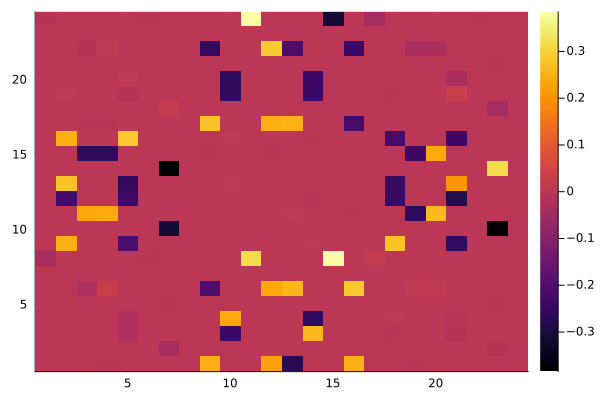

In [63]:
using Plots
heatmap(TDMs)

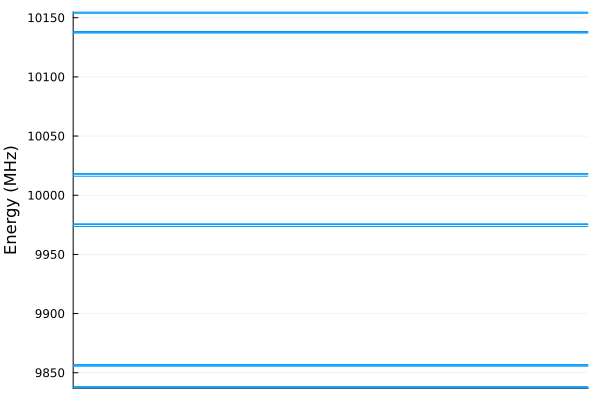

In [64]:
using Plots
hline(energy.(N1_states), legend=nothing)
plot!(
    xticks=nothing,
    ylabel="Energy (MHz)",
)

### Stark plots

In [819]:
function H_func!(H, scan_values)
    H.parameters.E = scan_values[1]
    evaluate!(H)
    solve!(H)
    return nothing
end

Es = H.parameters.E .+ (0:10:1000) .* 1e-3
scan_params = (
    E = Es,
    );
iterator = Iterators.product
@time scan_values, tracked_idxs = scan_parameters(deepcopy(H), scan_params, iterator, H_func!, H -> energy.(H.states), n_threads=10)
matrix_values = hcat(values(scan_values)...)'
;

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


  0.694613 seconds (336.06 k allocations: 183.094 MiB, 126.31% compilation time)


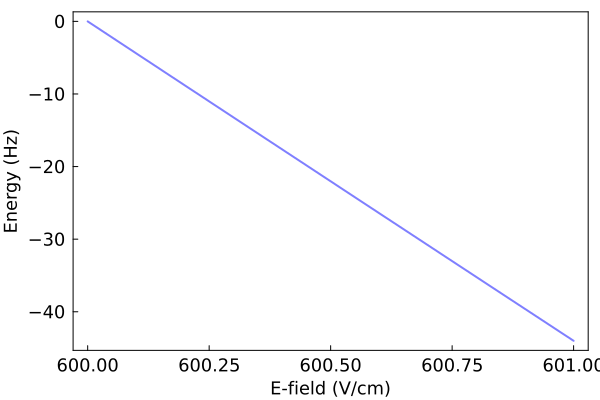

In [820]:
using Plots, LaTeXStrings
Es_rel = matrix_values .- matrix_values[1,:]'
plot(Es, 1e6 .* (Es_rel[:,idx_0] .- Es_rel[:,idx_1]), linewidth=2, linecolor=:blue, alpha=0.5, label="|0⟩ - |1⟩")
# plot!(Es, 1e6 .* Es_rel[:,idx_1], linewidth=2, linecolor=:green, alpha=0.5, label="|1⟩")
# plot!(Es, 1e6 .* Es_rel[:,idx_e], linewidth=2, linecolor=:red, alpha=0.5, label="|e⟩")
plot!(
    xlabel="E-field (V/cm)",
    ylabel="Energy (Hz)",
    labelfontsize=12,
    tickfontsize=12,
    grid=:off,
    box=:on,
    legend=nothing
)

### Zeeman plots

In [812]:
function H_func!(H, scan_values)
    H.parameters.B_z = scan_values[1]
    evaluate!(H)
    solve!(H)
    return nothing
end

Bs = H.parameters.B_z .+ (0:0.01:1) .* 1e-3
scan_params = (
    B = Bs,
    );
iterator = Iterators.product
@time scan_values, tracked_idxs = scan_parameters(deepcopy(H), scan_params, iterator, H_func!, H -> energy.(H.states), n_threads=10)
matrix_values = hcat(values(scan_values)...)'
;

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


  0.702996 seconds (336.38 k allocations: 183.132 MiB, 147.20% compilation time)


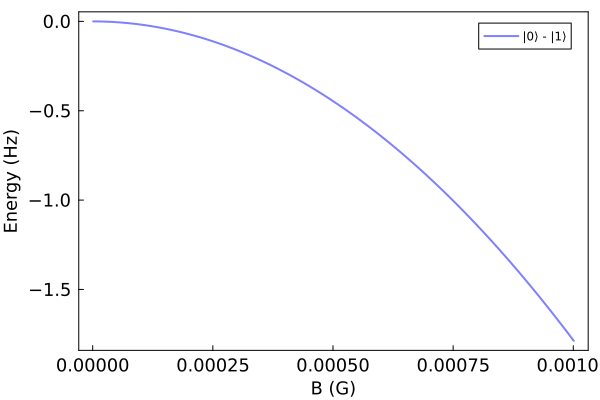

In [813]:
using Plots, LaTeXStrings
Es_rel = matrix_values .- matrix_values[1,:]'
plot(Bs, 1e6 .* (Es_rel[:,idx_0] .- Es_rel[:,idx_1]), linewidth=2, linecolor=:blue, alpha=0.5, label="|0⟩ - |1⟩")
# plot!(Bs, 1e6 .* (Es_rel[:,idx_0] .- Es_rel[:,idx_e]), linewidth=2, linecolor=:green, alpha=0.5, label="|0⟩ - |e⟩")
# plot!(Bs, 1e6 .* (Es_rel[:,idx_1] .- Es_rel[:,idx_e]), linewidth=2, linecolor=:red, alpha=0.5, label="|1⟩ - |e⟩")
plot!(
    xlabel="B (G)",
    ylabel="Energy (Hz)",
    labelfontsize=12,
    tickfontsize=12,
    grid=:off,
    box=:on
    )

### Trap shift plots

In [814]:
function H_func!(H, scan_values)
    H.parameters.I_scalar = scan_values[1]
    H.parameters.I_tensor = scan_values[1]
    evaluate!(H)
    solve!(H)
    return nothing
end
;

In [815]:
Is = (0:0.01:1.0) .* (I_trap / (2ε_0 * c))
scan_params = (
    I = Is,
    );
iterator = Iterators.product
@time scan_values, _ = scan_parameters(deepcopy(H), scan_params, iterator, H_func!, H -> energy.(H.states), n_threads=10)
matrix_values = hcat(values(scan_values)...)'
;

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


  0.641834 seconds (338.79 k allocations: 183.270 MiB, 142.59% compilation time)


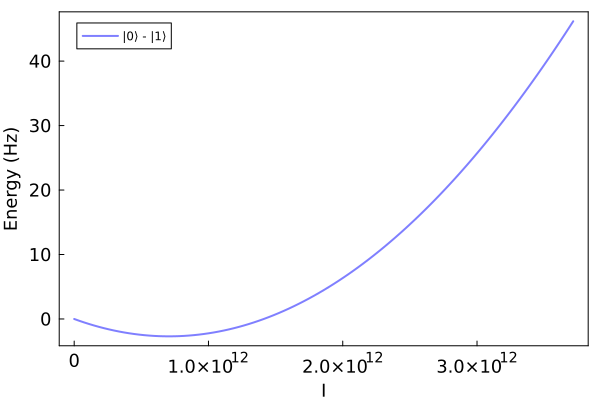

In [816]:
using Plots, LaTeXStrings
Es_rel = matrix_values .- matrix_values[1,:]'
plot(Is, 1e6 .* (Es_rel[:,idx_0] .- Es_rel[:,idx_1]), linewidth=2, linecolor=:blue, alpha=0.5, label="|0⟩ - |1⟩")
# plot!(Is, 1e6 .* (Es_rel[:,idx_0] .- Es_rel[:,idx_e]), linewidth=2, linecolor=:green, alpha=0.5, label="|0⟩ - |e⟩")
# plot!(Is, 1e6 .* (Es_rel[:,idx_1] .- Es_rel[:,idx_e]), linewidth=2, linecolor=:red, alpha=0.5, label="|1⟩ - |e⟩")
plot!(
    xlabel="I",
    ylabel="Energy (Hz)",
    labelfontsize=12,
    tickfontsize=12,
    grid=:off,
    box=:on
    )